In [1]:
# tabular data manipulation
import numpy as np
import pandas as pd
# datetime utilities
from datetime import timedelta, datetime

# visualization
import matplotlib.pyplot as plt

# no yelling in the library
import warnings
warnings.filterwarnings("ignore")

# our acquire script
from acquire import *

### Acquire

In [2]:
df = get_store_data()
df.head()

,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,level_0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [3]:
df = df.drop(columns = ['item','level_0','index','store'])

In [4]:
df.head()

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


### Summarize

In [5]:
df.shape

(913000, 14)

In [6]:
# null values by columns
df.isnull().sum()

sale_amount      0
sale_date        0
sale_id          0
store_address    0
store_city       0
store_id         0
store_state      0
store_zipcode    0
item_brand       0
item_id          0
item_name        0
item_price       0
item_upc12       0
item_upc14       0
dtype: int64

In [7]:
# unique values of items
df.item_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [8]:
# unique values of store_id
df.store_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [9]:
# number of unique sales dates
df.sale_date.nunique()

1826

In [10]:
# notice the item_upc columns are objects and not ints
df.describe()

,sale_amount,sale_id,store_id,item_id,item_price
count,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000
mean,52.250287,456500.500000,5.500000,25.500000,5.160400
std,28.801144,263560.542224,2.872283,14.430878,2.737764
min,0.000000,1.000000,1.000000,1.000000,0.600000
25%,30.000000,228250.750000,3.000000,13.000000,2.970000
50%,47.000000,456500.500000,5.500000,25.500000,5.195000
75%,70.000000,684750.250000,8.000000,38.000000,7.520000
max,231.000000,913000.000000,10.000000,50.000000,9.640000


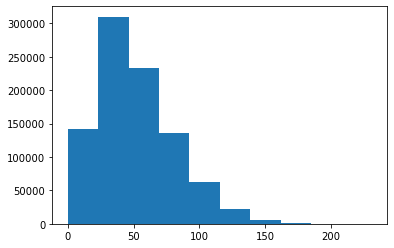

In [11]:
plt.hist('sale_amount',data=df)
plt.show()

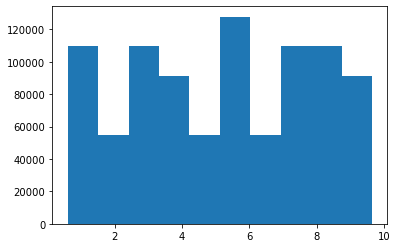

In [12]:
plt.hist('item_price',data=df)
plt.show()

### Clean and Prepare

In [13]:
df.head(2)

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [14]:
# Reassign the sale_date column to be a datetime type
df['sale_date'] = pd.to_datetime(df['sale_date']).dt.date

In [15]:
df.head(2)

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,2013-01-01,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,2013-01-02,2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [16]:
df['sale_date']= pd.to_datetime(df['sale_date'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   sale_amount    913000 non-null  float64       
 1   sale_date      913000 non-null  datetime64[ns]
 2   sale_id        913000 non-null  int64         
 3   store_address  913000 non-null  object        
 4   store_city     913000 non-null  object        
 5   store_id       913000 non-null  int64         
 6   store_state    913000 non-null  object        
 7   store_zipcode  913000 non-null  object        
 8   item_brand     913000 non-null  object        
 9   item_id        913000 non-null  int64         
 10  item_name      913000 non-null  object        
 11  item_price     913000 non-null  float64       
 12  item_upc12     913000 non-null  object        
 13  item_upc14     913000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(8

In [18]:
df['month'] = df.sale_date.dt.month
df['day_of_week'] = df.sale_date.dt.day_of_week

df.head(2)

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week
0,13.0,2013-01-01,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1
1,11.0,2013-01-02,2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,2


In [19]:
# set the index and sort so we can ensure that it's in chronological order
df = df.set_index('sale_date').sort_index()

In [20]:
df.head(2)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1
2013-01-01,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1


In [21]:
df['sales_total'] = df.sale_amount * df.item_price

In [22]:
df.head(2)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1,10.92
2013-01-01,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,218.40


### OPSD Data

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

In [24]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [26]:
df['Date'] = pd.to_datetime(df['Date'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [28]:
df.head(2)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN


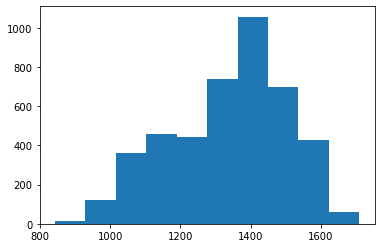

In [29]:
plt.hist('Consumption', data=df)
plt.show()

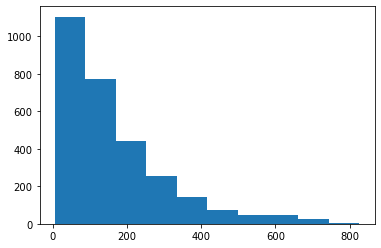

In [30]:
plt.hist('Wind', data=df)
plt.show()

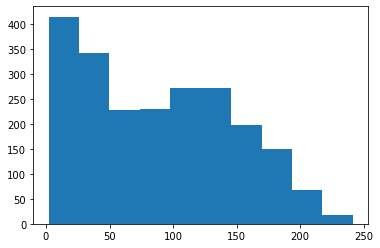

In [31]:
plt.hist('Solar', data=df)
plt.show()

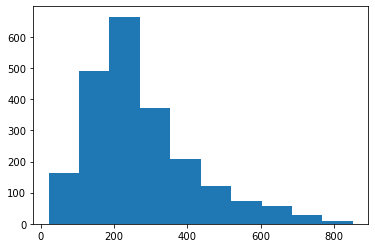

In [32]:
plt.hist('Wind+Solar', data=df)
plt.show()

In [33]:
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

In [34]:
df.head(2)

,Date,Consumption,Wind,Solar,Wind+Solar,month,year
0,2006-01-01,1069.184,NaN,NaN,NaN,1,2006
1,2006-01-02,1380.521,NaN,NaN,NaN,1,2006


In [38]:
df.fillna(0, inplace = True)

In [39]:
df = df.set_index(df.Date)

In [40]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,,
2006-01-01,2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,2006-01-05,1477.131,0.0,0.0,0.0,1,2006
